Name: Aayam Raj Shakya (as5160)

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

7.1. Read pp. 145–158, Python Machine Learning, 3rd Ed., about the PCA.

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


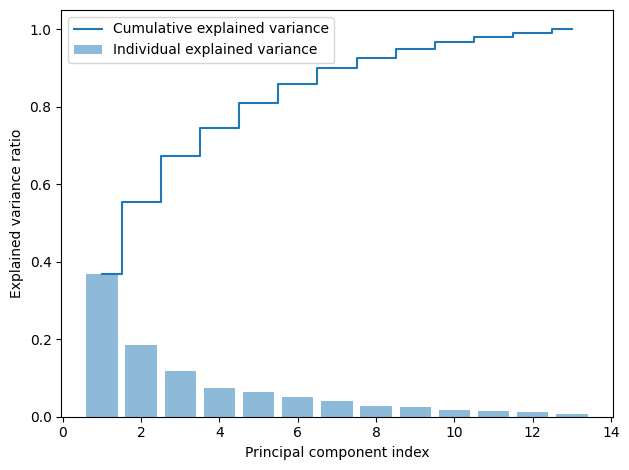

[0.36951469 0.55386396 0.67201555 0.74535807 0.80957914 0.86009639
 0.89964293 0.92608211 0.9499753  0.96627144 0.98007165 0.99179391
 1.        ]


In [4]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print(cum_var_exp)

In [5]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [6]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

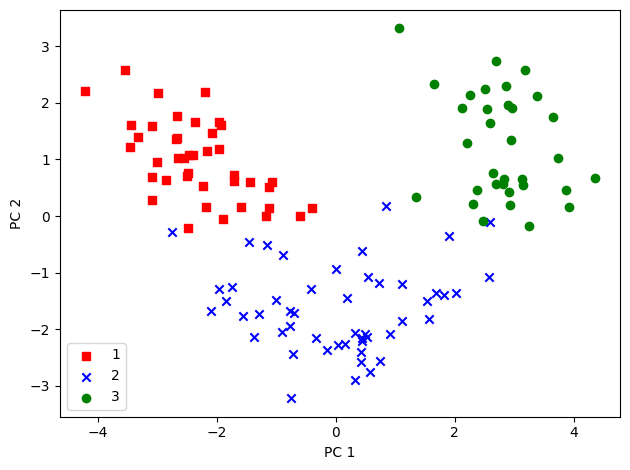

In [7]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [8]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

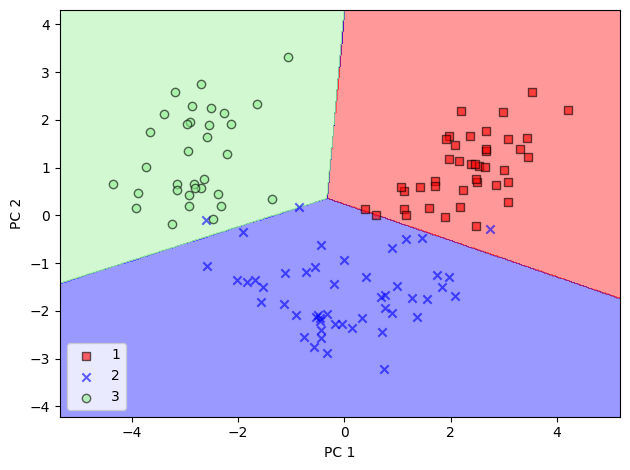

In [9]:
# initializing the PCA transformer and
# logistic regression estimator:

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fitting the logistic regression model on the reduced dataset:
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

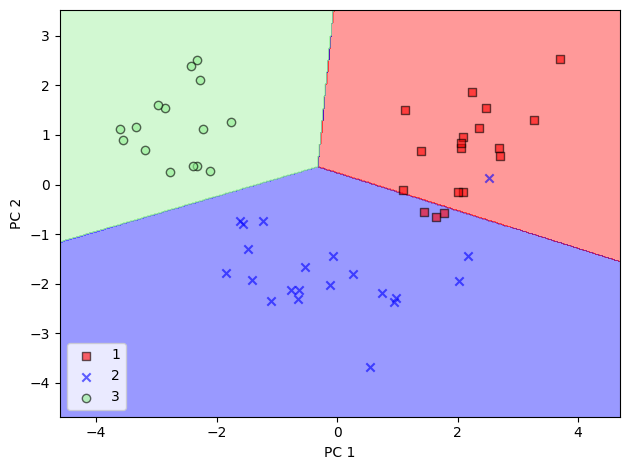

In [10]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

(a) Find the optimal number of components k∗ which produces the best classification accuracy (for logistic regression), by experimenting the example code with n_components = 1, 2, · · · , 13.

In [12]:
# REFERENCE: LogisticRegression (sklearn) score function
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score

accuracy_list = []
for n in range(1, 14):
  pca = PCA(n_components=n)
  lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
  X_train_pca = pca.fit_transform(X_train_std)
  X_test_pca = pca.transform(X_test_std)
  lr = lr.fit(X_train_pca, y_train)
  accuracy = lr.score(X_test_pca, y_test)
  accuracy_list.append(accuracy)
  print(f"n_components: {n}, accuracy: {accuracy:.4f}")

highest_accuracy_index = np.argmax(accuracy_list)
# Have to increment the index by 1 because numpy argmax is zero-indexed
optimal_k = highest_accuracy_index + 1
print(f"\nThe component with highest accuracy is: {optimal_k}")

n_components: 1, accuracy: 0.8889
n_components: 2, accuracy: 0.9259
n_components: 3, accuracy: 0.9259
n_components: 4, accuracy: 0.9259
n_components: 5, accuracy: 0.9259
n_components: 6, accuracy: 0.9815
n_components: 7, accuracy: 1.0000
n_components: 8, accuracy: 1.0000
n_components: 9, accuracy: 1.0000
n_components: 10, accuracy: 1.0000
n_components: 11, accuracy: 1.0000
n_components: 12, accuracy: 1.0000
n_components: 13, accuracy: 1.0000

The component with highest accuracy is: 7


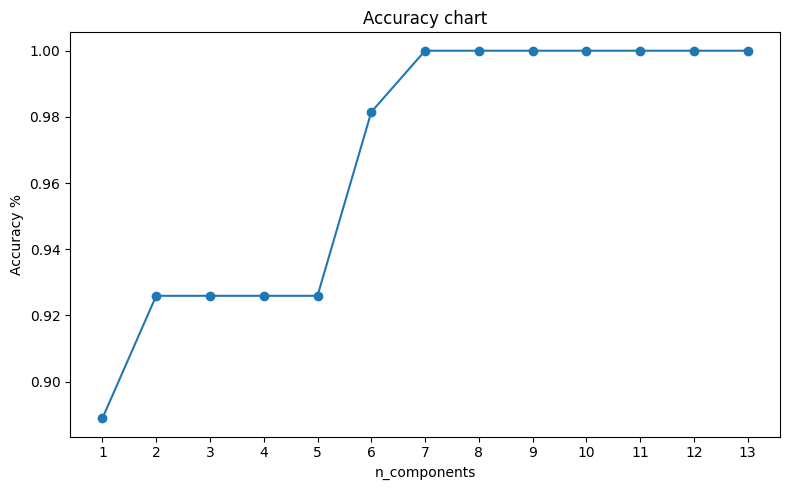

In [13]:
# Plotting accuracies
plt.figure(figsize=(8, 5))
plt.plot(range(1, 14), accuracy_list, 'o-')
plt.xticks(range(1, 14))  # Added to show full x-axis
plt.xlabel('n_components')
plt.ylabel('Accuracy %')
plt.title('Accuracy chart')
plt.tight_layout()
plt.show()

(b) What is the corresponding cumulative explained variance?

In [14]:
# Printing out cumulative explained variance for all n = 1...13 components
# Storing the values for the plot
cev_list = []
for n in range(1,14):
  pca = PCA(n_components=n)
  X_train_pca = pca.fit_transform(X_train_std)
  # np.sum gives the final sum, np.cumsum gives list of cumulative sums
  cum_exp_var = np.sum(pca.explained_variance_ratio_)
  cev_list.append(cum_exp_var)
  # change font color to indicate the requested cum exp var for the optimal k*
  if n == optimal_k:
    print(f"\033[31mn_components: {n}, \
    cumulative explained variance: {cum_exp_var:.4f}\033[0m")
  else:
    print(f"n_components: {n}, \
    cumulative explained variance: {cum_exp_var:.4f}")

n_components: 1,     cumulative explained variance: 0.3695
n_components: 2,     cumulative explained variance: 0.5539
n_components: 3,     cumulative explained variance: 0.6720
n_components: 4,     cumulative explained variance: 0.7454
n_components: 5,     cumulative explained variance: 0.8096
n_components: 6,     cumulative explained variance: 0.8601
n_components: 7,     cumulative explained variance: 0.8996
n_components: 8,     cumulative explained variance: 0.9261
n_components: 9,     cumulative explained variance: 0.9500
n_components: 10,     cumulative explained variance: 0.9663
n_components: 11,     cumulative explained variance: 0.9801
n_components: 12,     cumulative explained variance: 0.9918
n_components: 13,     cumulative explained variance: 1.0000


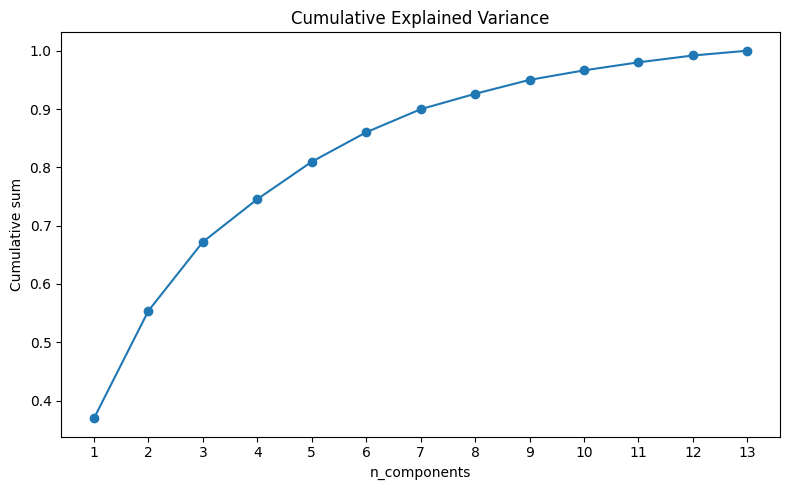

In [15]:
# Plotting accuracies
plt.figure(figsize=(8, 5))
plt.plot(range(1, 14), cev_list, 'o-')
plt.xticks(range(1, 14))  # Added to show full x-axis
plt.xlabel('n_components')
plt.ylabel('Cumulative sum')
plt.title('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

7.7. Try to understand the kernel PCA more deeply by experimenting pp. 175–188, Python Machine Learning, 3rd Ed.. Its implementation is slightly different from (but equivalent to) Summary 7.27.

(a) Modify the code, following Summary 7.27, and test if it works as expected as in Python Machine Learning, 3rd Ed..

In [16]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from scipy.spatial.distance import pdist, squareform
# from scipy import exp (this doesn't work)
from scipy.linalg import eigh

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]

    gamma: float
      Tuning parameter of the RBF kernel

    n_components: int
      Number of principal components to return

    Returns
    ------------
     alphas: {NumPy ndarray}, shape = [n_examples, k_features]
       Projected dataset

     lambdas: list
       Eigenvalues

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    # Follows K = K - K.1_(1/N) - 1_(1/N).K + 1_(1/N).K.1_(1/N)
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    # According to 7.106, Ak = μk * αk, where μ, α = eigvals, eigvecs
    # Alternatively, we can also sqrt the eigvals as shown in 7.97
    alphas = np.column_stack([(eigvals[i] * eigvecs[:, i])
                              for i in range(n_components)])

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

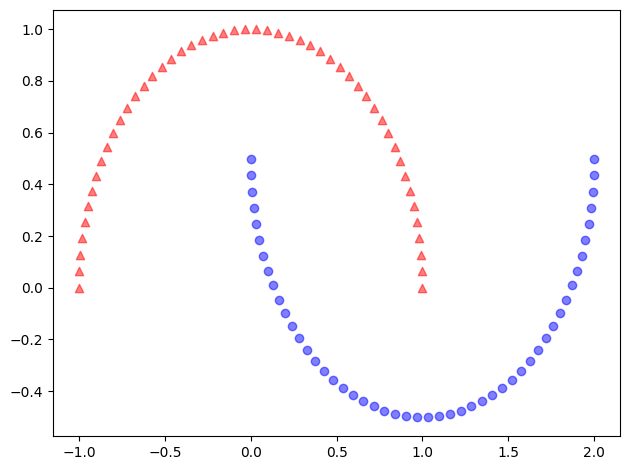

In [17]:
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

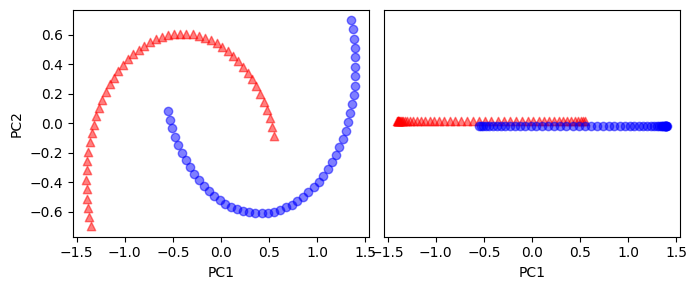

In [18]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

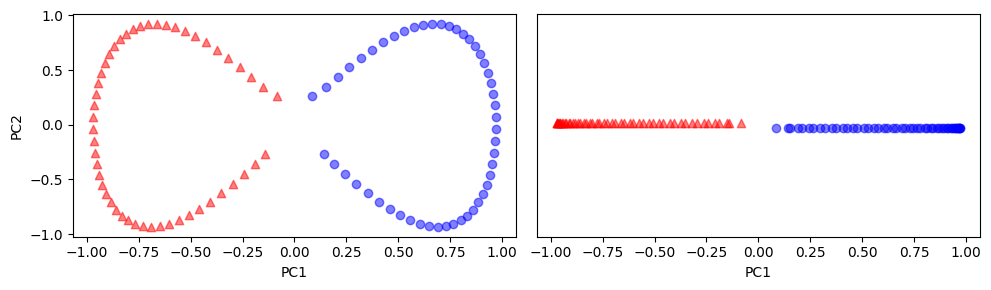

In [19]:
X_kpca,_ = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

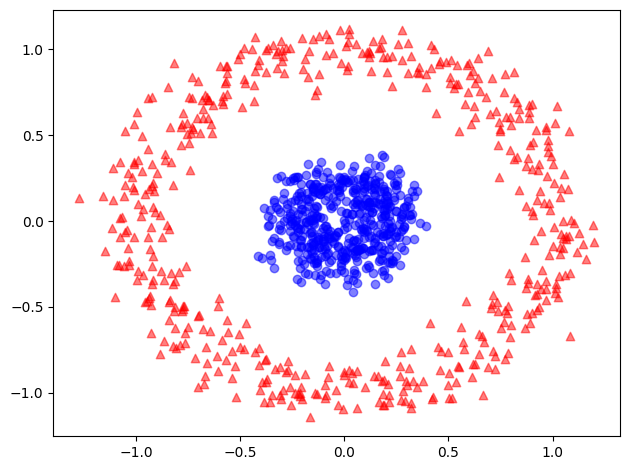

In [20]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

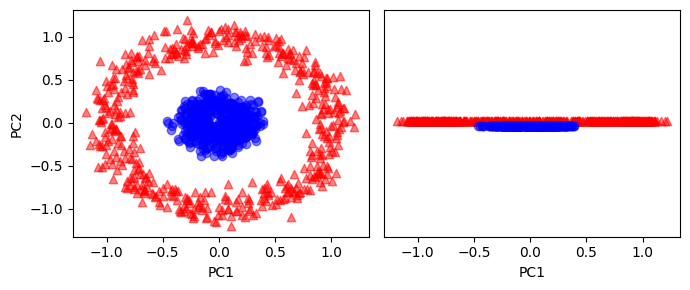

In [21]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

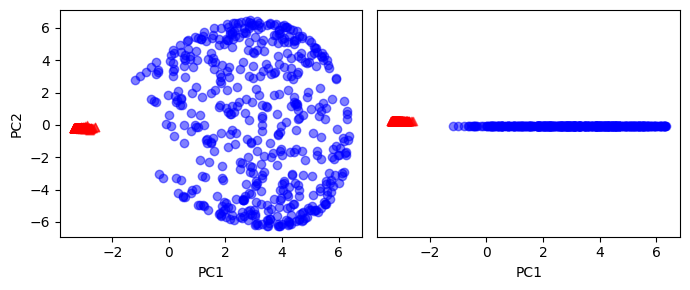

In [22]:
X_kpca, _ = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

In [23]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

x_new = X[25]
x_new

array([1.8713187 , 0.00928245])

In [24]:
x_proj = alphas[25] # original projection
x_proj

array([0.55635085])

In [25]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# projection of the "new" datapoint
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.55635085])

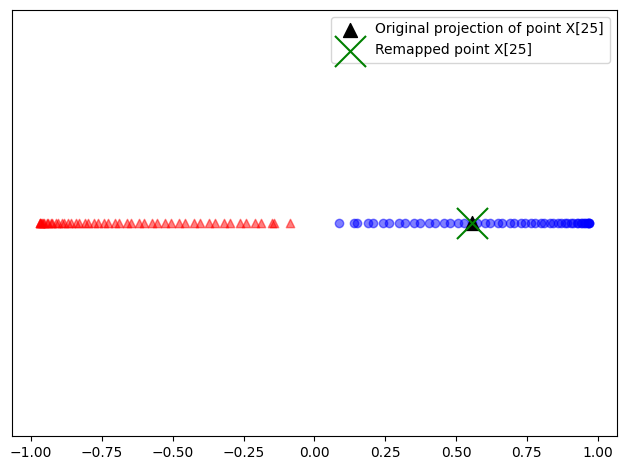

In [26]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)

plt.tight_layout()
plt.show()

(b) The datasets considered are transformed via the Gaussian radial basis function (RBF) kernel only. What happens if you use the following kernels?

K1(x^(i), x^(j)) = (a1 + b1 * x^(i) · x^(j))^2  ***(polynomial of degree up to 2)***

K2(x^(i), x^(j)) = tanh(a2 + b2 * x^(i) · x^(j))  ***(sigmoid)***

Can you find ai and bi
, i = 1, 2, appropriately?

In [27]:
def polynomial_kernel_pca(X, a1, b1, n_components=2):

    # REFERENCE: Raschka's book page no. 174
    # Polynomial kernel: K(xi, xj) = (xiT.xj + theta)^(P)
    K = (a1 + b1 * np.dot(X, X.T))**2

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    # Follows K = K - K.1_(1/N) - 1_(1/N).K + 1_(1/N).K.1_(1/N)
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    # According to 7.106, Ak = μk * αk, where μ, α = eigvals, eigvecs
    # Alternatively, we can also sqrt the eigvals as shown in 7.97
    alphas = np.column_stack([(eigvals[i] * eigvecs[:, i])
                              for i in range(n_components)])

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

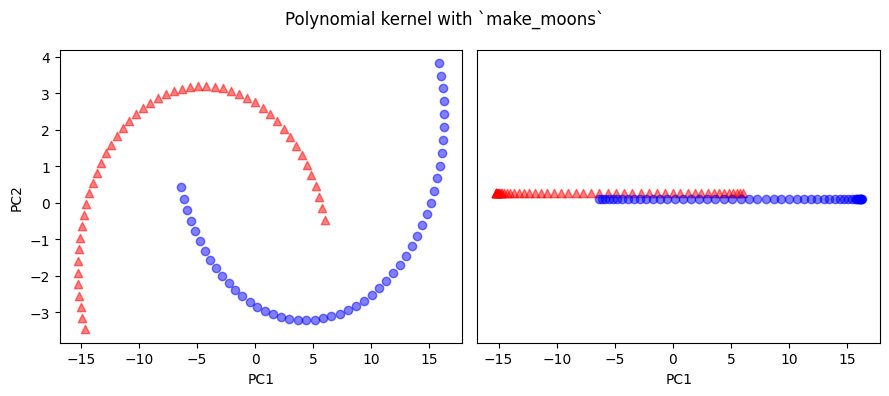

In [28]:
X, y = make_moons(n_samples=100, random_state=123)
X_kpca,_ = polynomial_kernel_pca(X, a1=3, b1=0.2, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.suptitle("Polynomial kernel with `make_moons`")
plt.tight_layout()
plt.show()

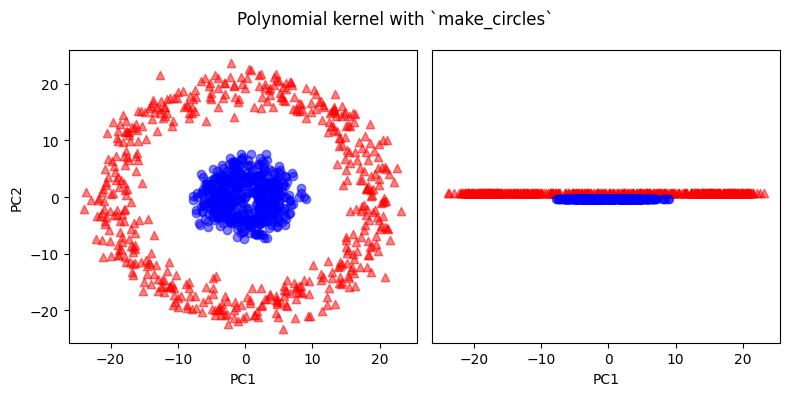

In [29]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
X_kpca,_ = polynomial_kernel_pca(X, a1=3, b1=0.2, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.suptitle("Polynomial kernel with `make_circles`")
plt.tight_layout()
plt.show()

In [30]:
def sigmoid_kernel_pca(X, a2, b2, n_components=2):

    # REFERENCE: Raschka's book page no. 174
    # Sigmoid kernel: K(xi, xj) = tanh(eta. xiT.xj + theta)
    K = np.tanh(a2 + b2 * np.dot(X, X.T))

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    # Follows K = K - K.1_(1/N) - 1_(1/N).K + 1_(1/N).K.1_(1/N)
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    # According to 7.106, Ak = μk * αk, where μ, α = eigvals, eigvecs
    # Alternatively, we can also sqrt the eigvals as shown in 7.97
    alphas = np.column_stack([(eigvals[i] * eigvecs[:, i])
                              for i in range(n_components)])

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

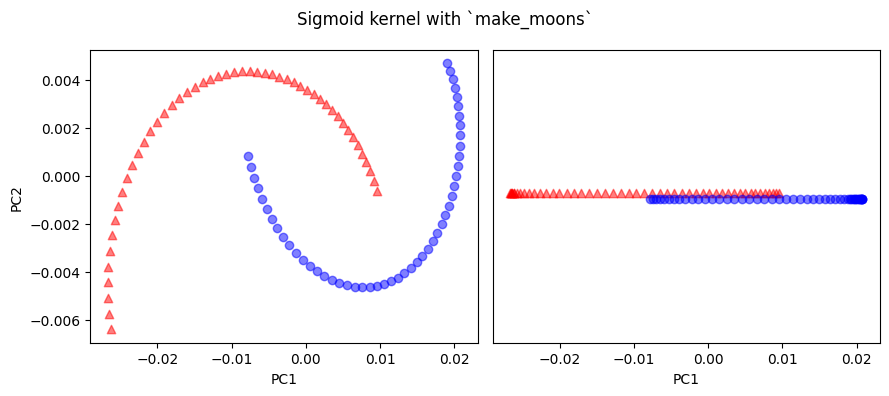

In [31]:
X, y = make_moons(n_samples=100, random_state=123)
X_kpca,_ = sigmoid_kernel_pca(X, a2=3, b2=0.2, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.suptitle("Sigmoid kernel with `make_moons`")
plt.tight_layout()
plt.show()

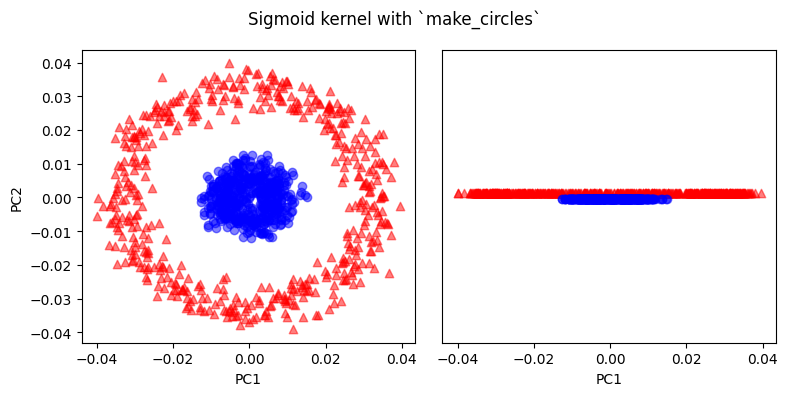

In [32]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
X_kpca,_ = sigmoid_kernel_pca(X, a2=3, b2=0.2, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.suptitle("Sigmoid kernel with `make_circles`")
plt.tight_layout()
plt.show()